In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\asus`


In [56]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots","Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\asus\Project.toml`
  No Changes to `C:\Users\asus\Manifest.toml`


In [62]:
using FFTW, Plots, Random, LinearAlgebra, Statistics

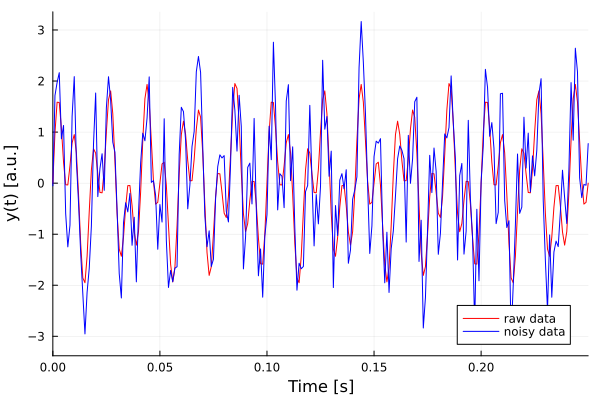

In [73]:
Ts = 0.001 # sampling time (s)
t = 0:Ts:2
n = length(t) # length of data
y1 = sin.(2 * π * 50 .* t) + sin.(2 * π * 120 .* t)
whitenoise = rand(n)
whitenoise = whitenoise .- mean(whitenoise)
y2 = y1 + 2.5 * whitenoise
fig = plot(t, y1, label = "raw data", color = :red, xlim = (0, 0.25), xlabel = "Time [s]", ylabel = "y(t) [a.u.]")
plot!(fig, t, y2, label = "noisy data", color = :blue)

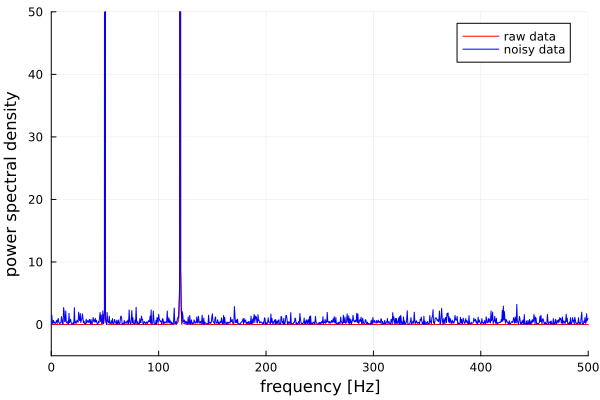

In [101]:
# compute fft
Fs = 1/Ts # sampling rate (Hz)
f = 0:Fs/(n - 1):Fs # frequency vector
Y1 = fft(y1) # capital letters for freq domain data
Y2 = fft(y2)
PSD1 = abs.(Y1 .* conj.(Y1))/n # power spectral density
PSD2 = abs.(Y2 .* conj.(Y2))/n
fig2 = plot(f, PSD1, label = "raw data", xlim = (0, Fs/2), xlabel = "frequency [Hz]", ylabel = "power spectral density", color = :red, ylim = (-5,50))
plot!(fig2, f, PSD2, label = "noisy data", color = :blue)

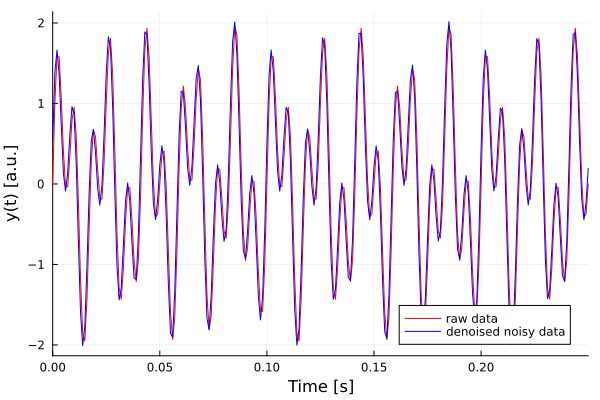

In [81]:
# hard thresholding PSD
thresh = 50
idx = PSD2 .> thresh
Y_denoised = idx .* Y2
y_denoised = ifft(Y_denoised)
y_denoised = real(y_denoised)
fig = plot(t, y1, label = "raw data", color = :red, xlim = (0, 0.25), xlabel = "Time [s]", ylabel = "y(t) [a.u.]")
plot!(fig, t, y_denoised, label = "denoised noisy data", color = :blue)

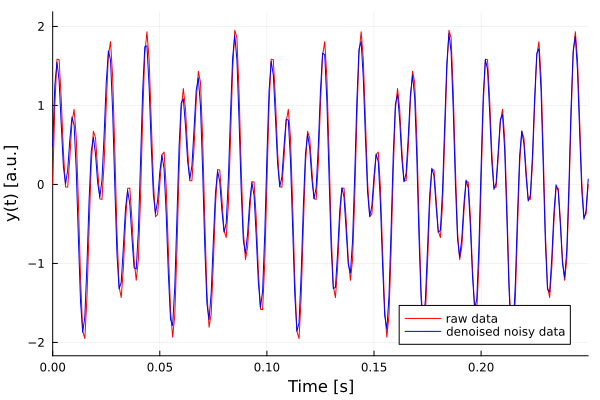

In [100]:
# second method: using ideal band pass filter
fpass1 = 49
fpass2 = 51
fpass3 = 119
fpass4 = 121
BPF = zeros(n)
BPF[(f .> fpass1) .& (f .< fpass2)] .= 1
BPF[(f .> fpass3) .& (f .< fpass4)] .= 1
BPF[(f .> Fs/2) .& (f .< Fs)] = reverse(BPF[(f .> 0) .& (f .< Fs/2)]) # making the filter symmetric to conserve all the power
Y_denoised = Y2 .* BPF
y_denoised = ifft(Y_denoised)
y_denoised = real(y_denoised)
fig = plot(t, y1, label = "raw data", color = :red, xlim = (0, 0.25), xlabel = "Time [s]", ylabel = "y(t) [a.u.]")
plot!(fig, t, y_denoised, label = "denoised noisy data", color = :blue)